<AxesSubplot:title={'center':'fg'}>

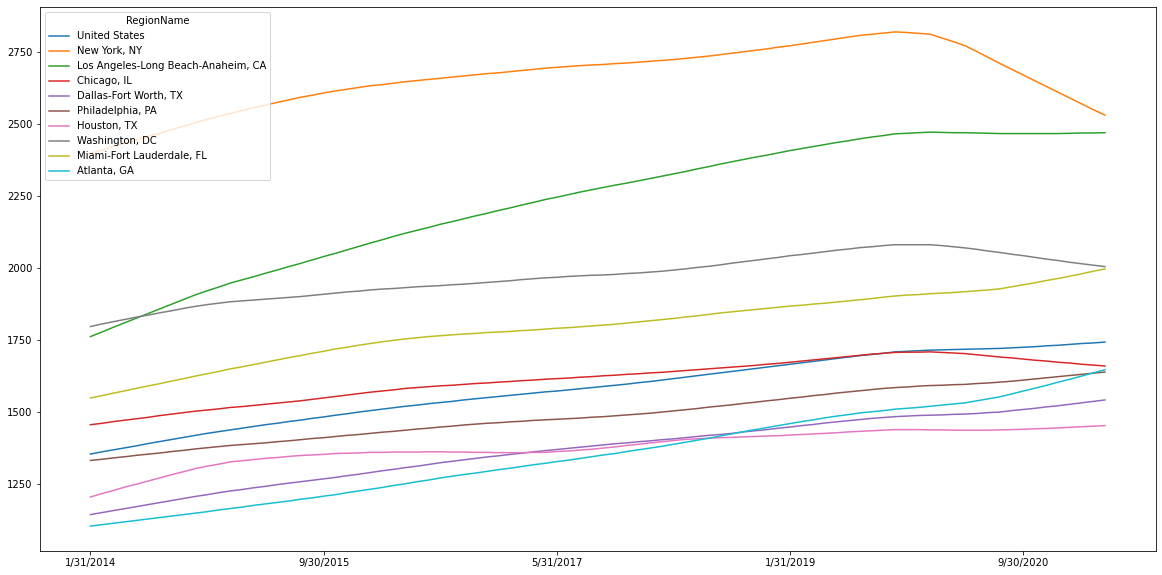

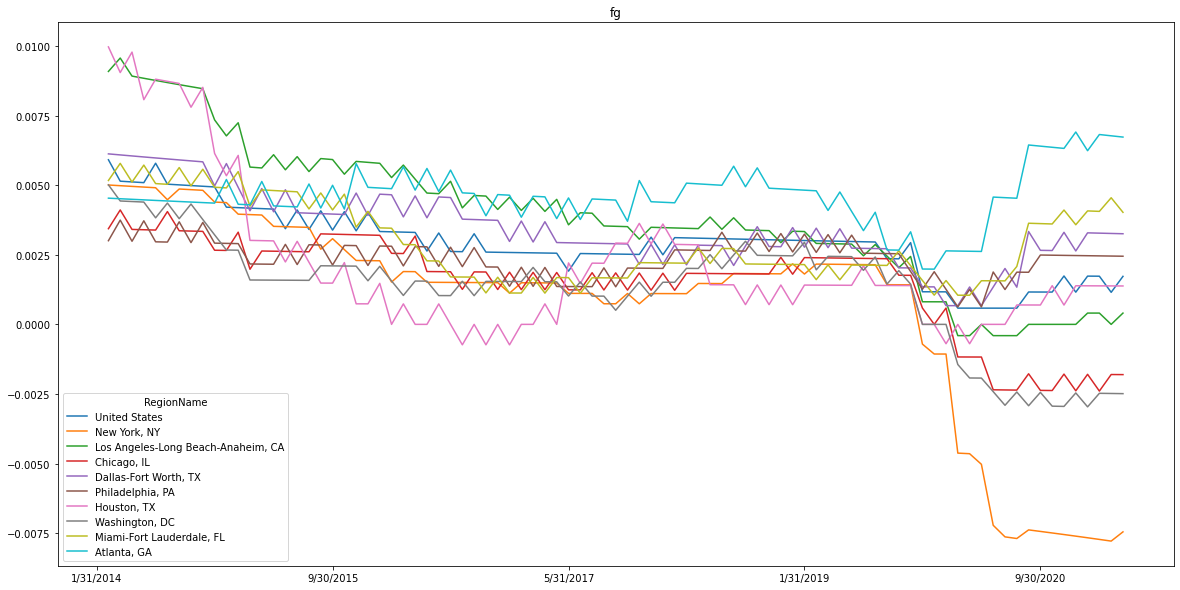

In [23]:
# Data Cleaning Rental File
import pandas as pd
import numpy as np
from datetime import datetime as dt
from pathlib import Path
import os
import sys
import csv
import datetime as dt
path=os.getcwd()

csv_path1=path+"/Files\Metro_ZORI_AllHomesPlusMultifamily_SSA.csv"
rental_file = pd.read_csv(csv_path1, index_col= "RegionName")

rental_file = rental_file.drop(columns=["SizeRank","RegionID"])

rent = rental_file.head(10)

rental = rent.transpose()

rental.plot.line(figsize=(20,10))

pct_change_rent = rental.pct_change()

pct_change_rent.plot(figsize=(20,10), title = "fg")

In [ ]:
import pandas as pd
import numpy as np
from pandas_datareader import data as wb  
from datetime import datetime as dt
import scipy.stats as st
from scipy.stats import norm
from pathlib import Path
import os
import sys
import csv
import matplotlib.pyplot as plt
import math
import seaborn as sns

%matplotlib inline


path=os.getcwd()
csv_path1=path+"\\Files\Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon_region_tiered.csv"
housing_indexing = pd.read_csv(csv_path1, index_col="Date")




def simulation(self):
    region = input("Which Region would you like to see a prediction for?")
    if region == "Northeast":
        s = "West", "South", "Midwest"
    elif region == "West":
        s = "Northeast", "South", "Midwest"
    elif region == "South":
        s = "Northeast", "West", "Midwest"
    else: s = "Northeast", "West", "South"
    sim=housing_indexing.drop(columns=[s])
    log_returns = np.log(1 + sim.pct_change())
    u = log_returns.mean()
    var = log_returns.var()
    drift = u - (0.5 * var)
    stdev = log_returns.std()
    np.array(drift)
    np.array(stdev)
    drift.values
    stdev.values
    norm.ppf(0.95)
    x = np.random.rand(10, 2)
    norm.ppf(x)
    Z = norm.ppf(np.random.rand(10,2))
    t_intervals = 60
    iterations = 100
    monthly_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))
    S0 = data.iloc[-1]
    price_list = np.zeros_like(monthly_returns)
    price_list[0] = S0
    for t in range(1, t_intervals):
        price_list[t] = price_list[t - 1] * monthly_returns[t]
    a= st.t.interval(0.95, len(data)-1, loc=np.mean(data), scale=st.sem(data))
    return price_list

simulation(housing_indexing)